In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('economy.csv')

In [3]:
df.shape

(20, 3)

In [4]:
df.head()

,unemplyment_rate,interest_Rate,index_price
0,5.3,2.50,1463
1,5.3,2.50,1369
2,5.4,2.50,1352
3,5.4,2.50,1251
4,5.5,2.25,1200


In [5]:
df.isnull().sum()

unemplyment_rate    0
interest_Rate       0
index_price         0
dtype: int64

In [6]:
df.corr()

,unemplyment_rate,interest_Rate,index_price
unemplyment_rate,1.000000,-0.642378,-0.679697
interest_Rate,-0.642378,1.000000,0.958633
index_price,-0.679697,0.958633,1.000000


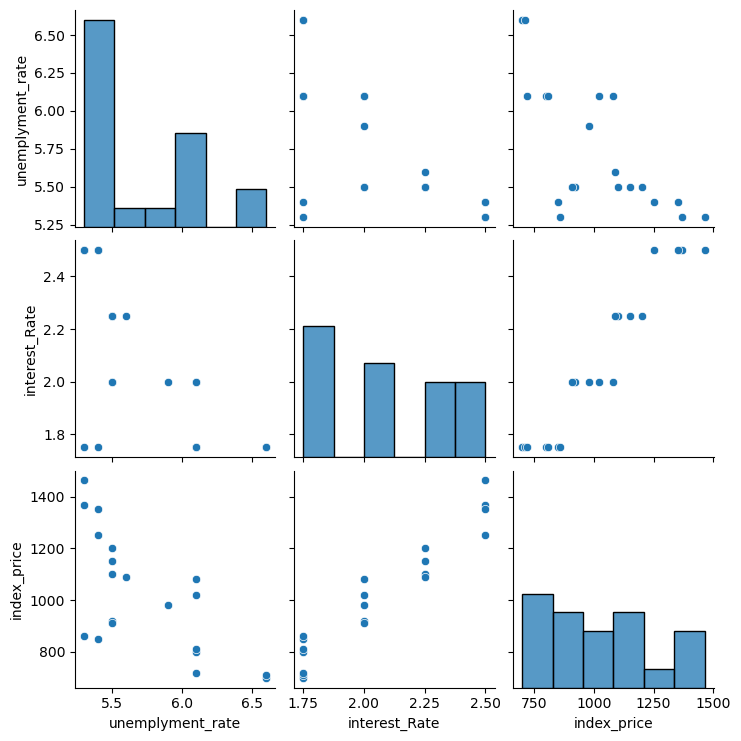

In [7]:
sns.pairplot(df)

In [8]:
##take the independent and dependent variable

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X

,unemplyment_rate,interest_Rate
0,5.3,2.50
1,5.3,2.50
2,5.4,2.50
3,5.4,2.50
4,5.5,2.25
5,5.5,2.25
6,5.5,2.25
7,5.6,2.25
8,6.1,2.00
9,6.1,2.00


In [10]:
y

0     1463
1     1369
2     1352
3     1251
4     1200
5     1150
6     1100
7     1090
8     1080
9     1020
10     980
11     920
12     910
13     800
14     810
15     850
16     860
17     700
18     710
19     720
Name: index_price, dtype: int64

In [11]:
## convert into the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
X_train

array([[-0.65465367,  0.76509206],
       [-0.65465367, -0.19127301],
       [-0.92742603,  1.72145713],
       [ 2.34584232, -1.14763808],
       [-1.2001984 , -1.14763808],
       [ 0.98198051, -1.14763808],
       [-0.92742603,  1.72145713],
       [ 0.98198051, -0.19127301],
       [ 0.98198051, -1.14763808],
       [-0.65465367,  0.76509206],
       [-0.65465367, -0.19127301],
       [-0.38188131,  0.76509206],
       [ 0.43643578, -0.19127301],
       [ 0.98198051, -1.14763808],
       [-0.65465367,  0.76509206]])

In [15]:
X_test

array([[-1.2001984 ,  1.72145713],
       [ 2.34584232, -1.14763808],
       [-0.92742603, -1.14763808],
       [-1.2001984 ,  1.72145713],
       [ 0.98198051, -0.19127301]])

<Axes: xlabel='unemplyment_rate', ylabel='interest_Rate'>

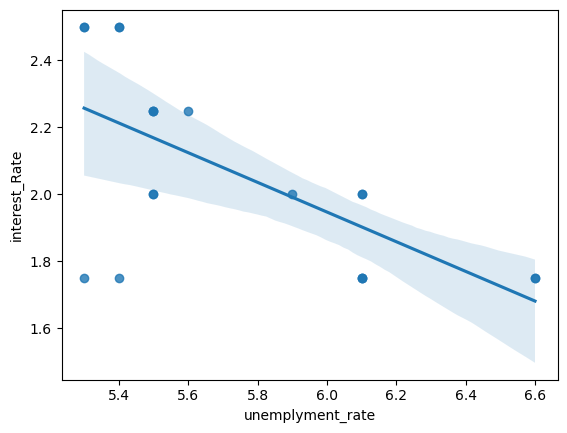

In [16]:
##regplot in seaborn

sns.regplot(x='unemplyment_rate', y='interest_Rate', data=df)

In [17]:
##now we train the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [18]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
##cross validation
from sklearn.model_selection import cross_val_score

In [20]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [22]:
np.mean(validation_score)

-6077.324867377274

In [23]:
y_pred=regression.predict(X_test)

In [24]:
y_pred

array([1308.26945485,  752.09446525,  811.98460258, 1308.26945485,
        940.8133583 ])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)


In [26]:
print(mae)
print(mse)
print(rmse)
print(score)

88.95151893466502
10232.33313908835
101.15499562101888
0.8801107891728248


In [28]:
##adjusted r2
adjusted_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-1-X_test.shape[1])

In [29]:
print(adjusted_score)

0.7602215783456496


In [30]:
residuals=y_test-y_pred

In [31]:
print(residuals)

0     154.730545
17    -52.094465
15     38.015397
1      60.730545
8     139.186642
Name: index_price, dtype: float64


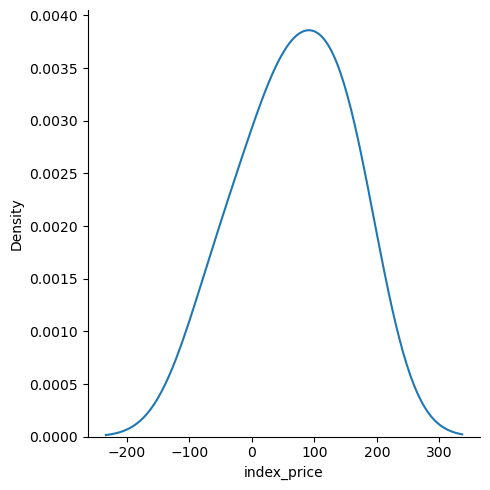

In [ ]:
sns.displot(residuals,kind='kde')##this show the distribution plot

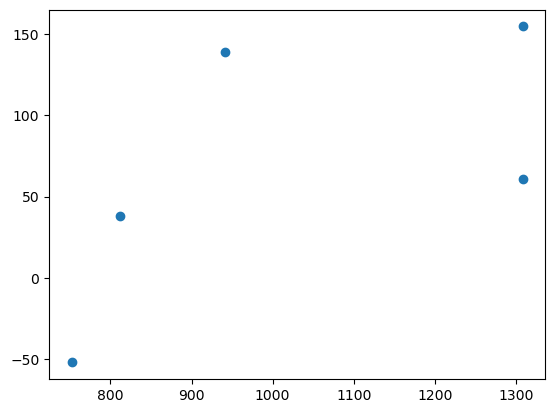

In [34]:
plt.scatter(y_pred,residuals) ##this show that you train your model is it right or wrong
##if in this plot there is some pattern then something is wrong in your model training 
##but in this plot all is fine

In [35]:
##OLS linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.116
Method:                 Least Squares   F-statistic:                             0.2224
Date:                Sat, 08 Mar 2025   Prob (F-statistic):                       0.804
Time:                        16:54:32   Log-Likelihood:                         -124.79
No. Observations:                  15   AIC:                                      253.6
Df Residuals:                      13   BIC:                                      255.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\PC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [38]:
regression.coef_

array([-18.29673918, 171.23656475])

In [39]:
df.head()

,unemplyment_rate,interest_Rate,index_price
0,5.3,2.50,1463
1,5.3,2.50,1369
2,5.4,2.50,1352
3,5.4,2.50,1251
4,5.5,2.25,1200


In [46]:
regression.predict(scaler.transform([[5.6,2.50]]))

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1293.29692052])